9973, 0.046407222747802734
49999, 0.0866549015045166
69997, 0.11271905899047852
89989, 0.17824935913085938
99991, 0.25327467918395996


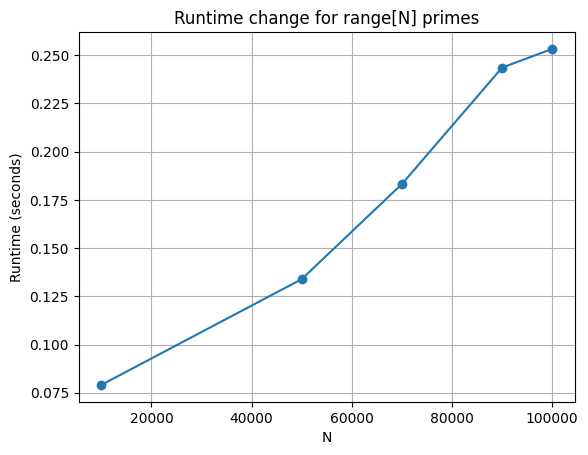

In [18]:
"""
This Python script uses multiple processes to find the largest prime number within the range [2, N]
for various predetermined values of N. It has functions to check if a number is prime,
find the largest prime in a range, and divide the range for parallel processing.
The script loops through the given N values, measures the time it takes for each calculation,
and prints the largest prime number and its runtime.
It also uses matplotlib to graph the change in runtime as N increases
"""
import multiprocessing as mp
import math
import time
import matplotlib.pyplot as plt

def p(x): # Function to calculate prime numbers
    if x <= 1:
        return False
    if x <= 3:
        return True
    if x % 2 == 0 or x % 3 == 0:
        return False
    i = 5
    while i * i <= x:
        if x % i == 0 or x % (i + 2) == 0:
            return False
        i += 6
    return True

def m(s, e):
    mp = -1
    for x in range(s, e + 1):
        if p(x) and x > mp:
            mp = x
    return mp

def i(N):
    mval = N // 2
    si = [(2, mval), (mval + 1, N)]

    pool = mp.Pool(processes=2)
    mp_list = pool.starmap(m, si)
    pool.close()
    pool.join()

    mp_max = max(mp_list)
    return mp_max

l = lambda N: i(N)  # Lambda function to find the maximum

v = [10_000, 50_000, 70_000, 90_000, 100000]
for N in v:
    t = time.time()
    mp_val = l(N)
    e = time.time()
    print(f"{mp_val}, {e - t}")

def c(N):
    t = time.time()  # Start time
    mp_val = l(N)
    e = time.time()  # End time
    return e - t

r = [c(N) for N in v]

plt.plot(v, r, marker='o')  # Plotting the graphs
plt.title('Runtime change for range[N] primes')
plt.xlabel('N')
plt.ylabel('Runtime (seconds)')
plt.grid(True)
plt.show()
